# Rear Tire Cornering Analysis
## R25B 18.0 x 7.5-10 on 7" Rim
### Comparing Different Influences on Tire Load Outputs

In [117]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import data_helpers
import copy

### Import tire data files and convert into a Pandas DataFrame

In [118]:
data_files_names = ["rear_tire/RunData_10inch_Cornering_Matlab_SI_Round6/B1654run21.mat",
                "rear_tire/RunData_10inch_Cornering_Matlab_SI_Round6/B1654run22.mat"]     
   
datas = [sio.loadmat(file_name) for file_name in data_files_names]

df = data_helpers.clean_data(datas)

### Classify each data point by closest variable sweep. Classification is stored in DataFrame columns 'load', 'camber', 'pressure', and 'velocity'

In [119]:
variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    temp_nearest_func = lambda x: data_helpers.get_nearest_value(info["sweep"], x)
    df[variable] = df[info["label"]].apply(temp_nearest_func)

### Look at distribution of samples on variable sweeps

In [120]:
for variable, info in variable_sweeps.items():
    count = df.groupby([variable])[variable].count()
    variable_sweeps[variable]["count"] = count
    print(count, "\n")

load
-1112.055122    28070
-889.644098     21787
-667.233073     21736
-444.822049     21733
-222.411024     21734
Name: load, dtype: int64 

camber
0    51134
2    31962
4    31964
Name: camber, dtype: int64 

pressure
55.15808    20461
68.94760    20453
82.73712    53696
96.52664    20450
Name: pressure, dtype: int64 

velocity
24.1401      6394
40.2335    102276
72.4203      6390
Name: velocity, dtype: int64 



### Comparing lateral force and self aligning moment against slip angle for different pressures. Holds camber, velocity, and load constant by choosing most commonly used value.

In [121]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable is not "pressure":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

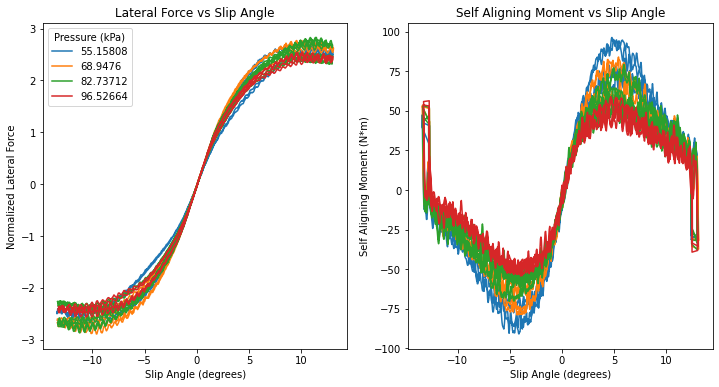

In [125]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["pressure"]["sweep"], title = "Pressure (kPa)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, it is clear the 82.74 kPa (12 psi) pressure is optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different cambers. Holds pressure, velocity, and load constant by choosing most commonly used value.

In [128]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable is not "camber":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

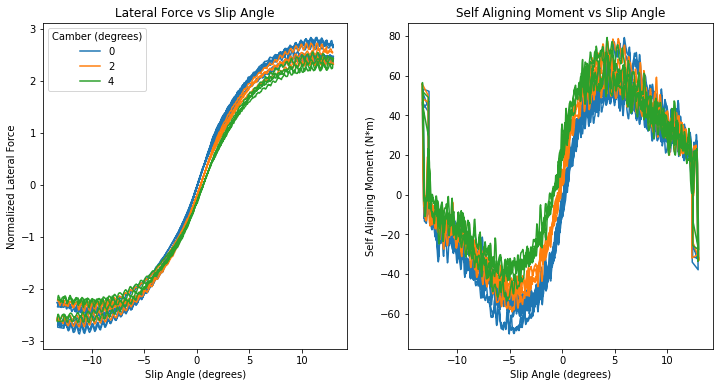

In [130]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["camber"]["sweep"], title = "Camber (degrees)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, the closer the camber is to zero, the more optimal for the tire because it maximizes lateral force